In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

#set to display all the columns in dataset

pd.set_option("display.max_columns",None)

#import psql to run queries

import pandasql as psql

In [2]:
#load the general dataset
bcdata = pd.read_csv(r"Loan_Defaulter.csv" ,header = 1)

#copy to the back up file
bcdata_BK =bcdata.copy()

#display the first five records
bcdata.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [3]:
#DISPLAY THE INFO OF THE DATASET

bcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30203 entries, 0 to 30202
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30202 non-null  object
 1   LIMIT_BAL                   30203 non-null  object
 2   SEX                         30203 non-null  object
 3   EDUCATION                   30203 non-null  object
 4   MARRIAGE                    30203 non-null  object
 5   AGE                         30203 non-null  object
 6   PAY_0                       30203 non-null  object
 7   PAY_2                       30203 non-null  object
 8   PAY_3                       30203 non-null  object
 9   PAY_4                       30203 non-null  object
 10  PAY_5                       30203 non-null  object
 11  PAY_6                       30203 non-null  object
 12  BILL_AMT1                   30203 non-null  object
 13  BILL_AMT2                   30203 non-null  ob

In [4]:
bcdata.isnull().sum()

ID                            1
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
bcdata.nunique()

ID                            30001
LIMIT_BAL                        83
SEX                               4
EDUCATION                         6
MARRIAGE                          6
AGE                              58
PAY_0                            13
PAY_2                            13
PAY_3                            13
PAY_4                            13
PAY_5                            12
PAY_6                            12
BILL_AMT1                     22725
BILL_AMT2                     22348
BILL_AMT3                     22028
BILL_AMT4                     21550
BILL_AMT5                     21012
BILL_AMT6                     20606
PAY_AMT1                       7945
PAY_AMT2                       7901
PAY_AMT3                       7520
PAY_AMT4                       6939
PAY_AMT5                       6899
PAY_AMT6                       6941
default payment next month        4
dtype: int64

In [6]:
bcdata['default payment next month'].value_counts()

default payment next month
not default                   23519
default                        6682
Y                                 1
default payment next month        1
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
bcdata['LIMIT_BAL']=LE.fit_transform(bcdata['LIMIT_BAL'])
bcdata['PAY_0']=LE.fit_transform(bcdata['PAY_0'])
bcdata['PAY_2']=LE.fit_transform(bcdata['PAY_2'])
bcdata['PAY_3']=LE.fit_transform(bcdata['PAY_3'])
bcdata['PAY_4']=LE.fit_transform(bcdata['PAY_4'])
bcdata['PAY_5']=LE.fit_transform(bcdata['PAY_5'])
bcdata['PAY_6']=LE.fit_transform(bcdata['PAY_6'])
bcdata['BILL_AMT1']=LE.fit_transform(bcdata['BILL_AMT1'])
bcdata['BILL_AMT2']=LE.fit_transform(bcdata['BILL_AMT2'])
bcdata['BILL_AMT3']=LE.fit_transform(bcdata['BILL_AMT3'])
bcdata['BILL_AMT4']=LE.fit_transform(bcdata['BILL_AMT4'])
bcdata['BILL_AMT5']=LE.fit_transform(bcdata['BILL_AMT5'])
bcdata['BILL_AMT6']=LE.fit_transform(bcdata['BILL_AMT6'])
bcdata['PAY_AMT1']=LE.fit_transform(bcdata['PAY_AMT1'])
bcdata['PAY_AMT2']=LE.fit_transform(bcdata['PAY_AMT2'])
bcdata['PAY_AMT3']=LE.fit_transform(bcdata['PAY_AMT3'])
bcdata['PAY_AMT4']=LE.fit_transform(bcdata['PAY_AMT4'])
bcdata['PAY_AMT5']=LE.fit_transform(bcdata['PAY_AMT5'])
bcdata['PAY_AMT6']=LE.fit_transform(bcdata['PAY_AMT6'])


In [8]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
bcdata['default payment next month']=LE.fit_transform(bcdata['default payment next month'])

In [9]:
bcdata['default payment next month'].value_counts()

default payment next month
3    23519
1     6682
0        1
2        1
Name: count, dtype: int64

In [10]:
bcdata=bcdata[bcdata['default payment next month'] != 0]
bcdata=bcdata[bcdata['default payment next month'] != 2]


In [11]:
bcdata['default payment next month'].value_counts()

default payment next month
3    23519
1     6682
Name: count, dtype: int64

In [12]:
bcdata['default payment next month']=LE.fit_transform(bcdata['default payment next month'])

In [13]:
bcdata['default payment next month']


0        0
1        0
2        1
3        1
4        1
        ..
30198    1
30199    1
30200    0
30201    0
30202    0
Name: default payment next month, Length: 30201, dtype: int64

In [14]:
#count the target or dependent variable by 0 or 1 and their proportion

bcdata_count=bcdata['default payment next month'].value_counts()
print('class 0 :',bcdata_count[0])
print('class 1 :',bcdata_count[1])
print('Proportion:', round(bcdata_count[0] / bcdata_count[1], 2), ': 1')
print('Total loan records:', len(bcdata))

class 0 : 6682
class 1 : 23519
Proportion: 0.28 : 1
Total loan records: 30201


In [15]:
#dispaly duplicate values with in dataset

bcdata_dup=bcdata[bcdata.duplicated(keep="last")]

#display the duplicate records

bcdata_dup

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,13,female,university,1,24,4,4,0,0,1,1,13344,11403,18439,377,384,414,0,6670,0,0,0,0,0
1,2,4,female,university,2,26,0,4,2,2,2,3,10029,5551,9758,11832,11970,11338,0,4,4,4,0,2002,0
2,3,80,female,university,2,34,2,2,2,2,2,2,10923,3481,3104,3619,3949,4233,1494,1476,4,4,4,4750,1
3,4,47,female,university,1,37,2,2,2,2,2,2,15025,15170,15396,10317,10406,10457,2415,2535,645,336,262,4,1
4,5,47,male,university,1,57,0,2,0,2,2,2,21267,16960,12420,7716,6476,6344,2415,4507,5,6619,5776,5795,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,7,female,university,1,34,1,1,1,1,1,1,306,347,364,1664,384,3930,0,0,531,0,1185,0,1
197,198,13,female,graduate school,2,22,2,2,2,2,0,2,6487,6921,6583,19785,6285,6435,1421,189,5501,2010,5787,4,1
198,199,48,female,graduate school,1,34,1,1,1,0,0,0,13756,3324,8433,2339,1979,1604,1146,2967,785,610,472,1334,1
199,200,24,female,high school,2,22,3,4,4,2,2,2,10846,10807,10229,11010,4695,414,4,7406,1784,177,0,0,0


In [16]:
#delete the duplicates from the dataset

bcdata=bcdata.drop_duplicates()
bcdata.shape

(30000, 25)

In [17]:
#reset the dataset

bcdata=bcdata.reset_index(drop=True)
bcdata_BK2=bcdata.copy()

In [18]:
#delete the independent variables

bcdata.drop(["ID","SEX","EDUCATION","MARRIAGE","AGE"],axis=1,inplace=True)

In [19]:
# identify independent and target variable
IndepVar=[]
for col in bcdata.columns:
    if col!="default payment next month":
        IndepVar.append(col)
TargetVar="default payment next month"

x=bcdata[IndepVar]
y=bcdata[TargetVar]

In [20]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test datasets

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21000, 19), (9000, 19), (21000,), (9000,))

In [21]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [22]:
#load the dataset

EMResults=pd.read_csv(r"EMResults.csv")
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# COMPARE THE CLASSIFICATION MODELS

Model Name:  LogisticRegression()
Confusion matrix : 
 [[6823  217]
 [1547  413]]
Outcome values : 
 6823 217 1547 413
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.97      0.89      7040
           0       0.66      0.21      0.32      1960

    accuracy                           0.80      9000
   macro avg       0.74      0.59      0.60      9000
weighted avg       0.78      0.80      0.76      9000

Accuracy : 80.4 %
Precision : 81.5 %
Recall : 96.9 %
F1 Score : 0.886
Specificity or True Negative Rate : 21.1 %
Balanced Accuracy : 59.0 %
MCC : 0.291
roc_auc_score: 0.59


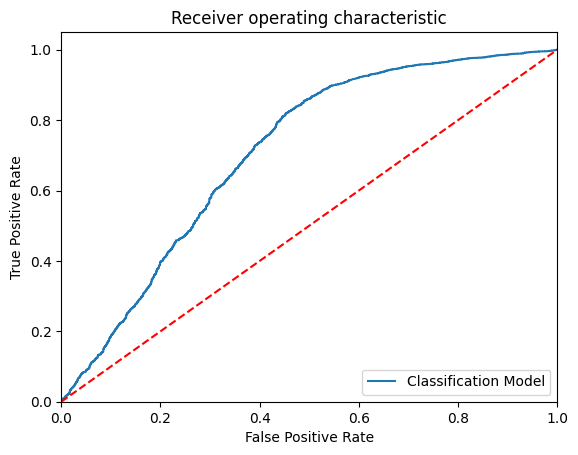

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[5663 1377]
 [1140  820]]
Outcome values : 
 5663 1377 1140 820
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.80      0.82      7040
           0       0.37      0.42      0.39      1960

    accuracy                           0.72      9000
   macro avg       0.60      0.61      0.61      9000
weighted avg       0.73      0.72      0.73      9000

Accuracy : 72.0 %
Precision : 83.2 %
Recall : 80.4 %
F1 Score : 0.818
Specificity or True Negative Rate : 41.8 %
Balanced Accuracy : 61.1 %
MCC : 0.214
roc_auc_score: 0.611


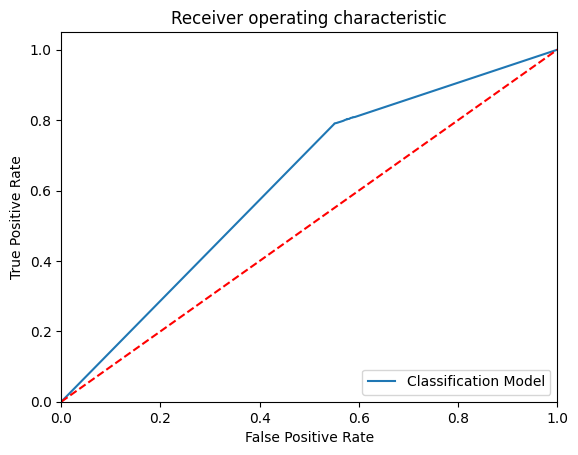

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[6589  451]
 [1235  725]]
Outcome values : 
 6589 451 1235 725
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.94      0.89      7040
           0       0.62      0.37      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

Accuracy : 81.3 %
Precision : 84.2 %
Recall : 93.6 %
F1 Score : 0.887
Specificity or True Negative Rate : 37.0 %
Balanced Accuracy : 65.3 %
MCC : 0.375
roc_auc_score: 0.653


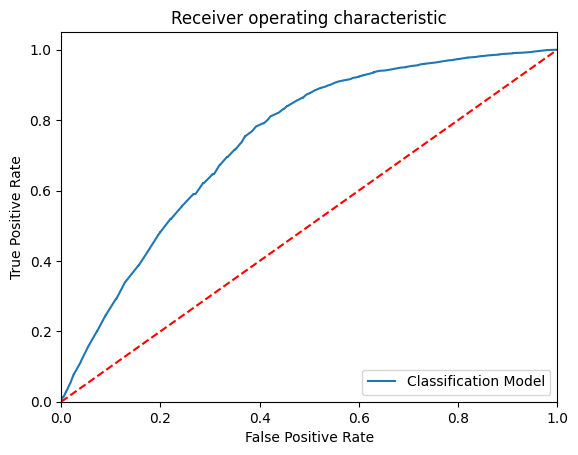

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[6521  519]
 [1189  771]]
Outcome values : 
 6521 519 1189 771
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.93      0.88      7040
           0       0.60      0.39      0.47      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.66      0.68      9000
weighted avg       0.79      0.81      0.79      9000

Accuracy : 81.0 %
Precision : 84.6 %
Recall : 92.6 %
F1 Score : 0.884
Specificity or True Negative Rate : 39.3 %
Balanced Accuracy : 66.0 %
MCC : 0.376
roc_auc_score: 0.66


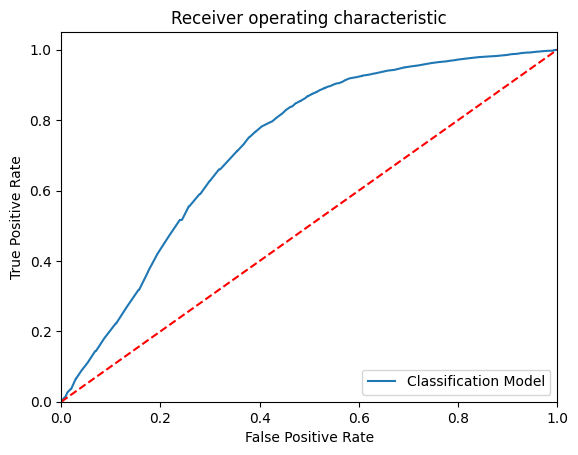

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[6512  528]
 [1427  533]]
Outcome values : 
 6512 528 1427 533
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.93      0.87      7040
           0       0.50      0.27      0.35      1960

    accuracy                           0.78      9000
   macro avg       0.66      0.60      0.61      9000
weighted avg       0.75      0.78      0.76      9000

Accuracy : 78.3 %
Precision : 82.0 %
Recall : 92.5 %
F1 Score : 0.869
Specificity or True Negative Rate : 27.2 %
Balanced Accuracy : 59.8 %
MCC : 0.252
roc_auc_score: 0.598


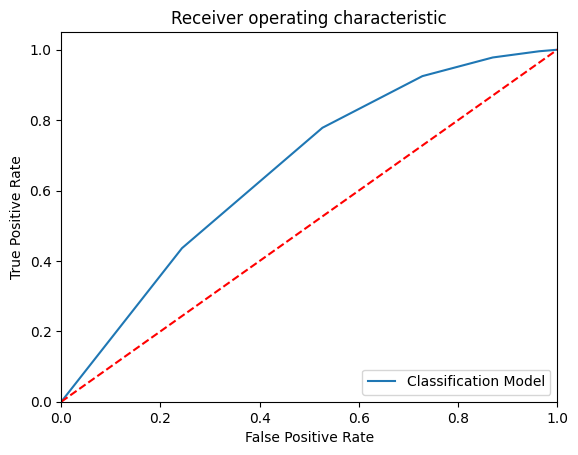

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[6178  862]
 [1077  883]]
Outcome values : 
 6178 862 1077 883
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.88      0.86      7040
           0       0.51      0.45      0.48      1960

    accuracy                           0.78      9000
   macro avg       0.68      0.66      0.67      9000
weighted avg       0.78      0.78      0.78      9000

Accuracy : 78.5 %
Precision : 85.2 %
Recall : 87.8 %
F1 Score : 0.864
Specificity or True Negative Rate : 45.1 %
Balanced Accuracy : 66.4 %
MCC : 0.342
roc_auc_score: 0.664


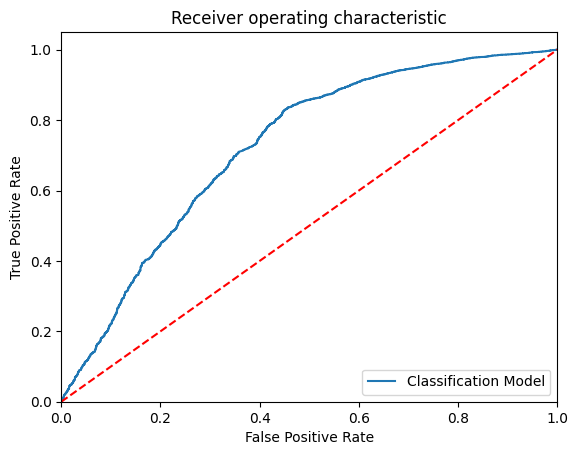

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[6672  368]
 [1313  647]]
Outcome values : 
 6672 368 1313 647
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.95      0.89      7040
           0       0.64      0.33      0.43      1960

    accuracy                           0.81      9000
   macro avg       0.74      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000

Accuracy : 81.3 %
Precision : 83.6 %
Recall : 94.8 %
F1 Score : 0.888
Specificity or True Negative Rate : 33.0 %
Balanced Accuracy : 63.9 %
MCC : 0.363
roc_auc_score: 0.639


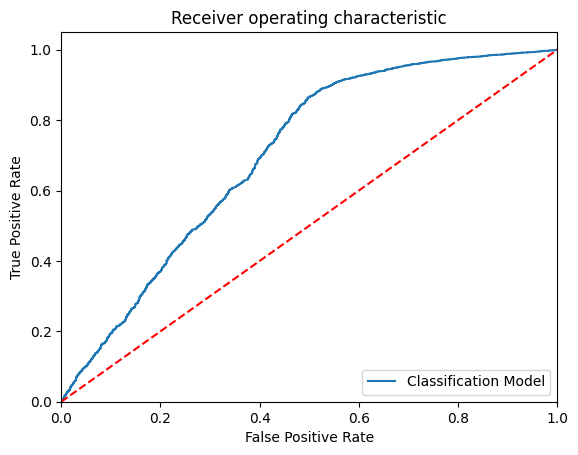

-----------------------------------------------------------------------------------------------------


In [23]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
#MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:
            
    # Train the model training dataset
    if isinstance(models,KNeighborsClassifier):
        x_test=np.ascontiguousarray(x_test)
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = pd.concat([EMResults, pd.DataFrame([new_row])], ignore_index=True)

    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>

In [24]:
EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),6823,217,1547,413,0.804,0.815,0.969,0.886,0.211,0.291,0.589945,0.590
1,DecisionTreeClassifier(),5663,1377,1140,820,0.720,0.832,0.804,0.818,0.418,0.214,0.611385,0.611
2,"(DecisionTreeClassifier(max_features='sqrt', r...",6589,451,1235,725,0.813,0.842,0.936,0.887,0.370,0.375,0.652918,0.653
3,"(ExtraTreeClassifier(random_state=358246060), ...",6521,519,1189,771,0.810,0.846,0.926,0.884,0.393,0.376,0.659823,0.660
4,KNeighborsClassifier(),6512,528,1427,533,0.783,0.820,0.925,0.869,0.272,0.252,0.598469,0.598
5,GaussianNB(),6178,862,1077,883,0.785,0.852,0.878,0.864,0.451,0.342,0.664034,0.664
6,SVC(probability=True),6672,368,1313,647,0.813,0.836,0.948,0.888,0.330,0.363,0.638915,0.639


In [29]:
# predict the values with decision tree Algorithms

y_pred=ModelDC.predict(x_test)

In [30]:
#display the final results

Results=pd.DataFrame({"default payment next month_A":y_test,"default payment next month_P":y_pred})

#merge two dataframes on index of both the dataframes

ResultsFinal=bcdata_BK.merge(Results,left_index=True,right_index=True)

#display 10 records randomly

ResultsFinal.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,default payment next month_A,default payment next month_P
23817,23615,200000,female,graduate school,2,35,-2,-1,-1,-1,-1,-1,0,185,1916,0,150,1348,185,1916,0,150,1348,1000,not default,0,1
26802,26600,240000,male,high school,2,35,-1,-1,-1,-1,-1,0,11119,10361,10000,10200,30000,24000,10722,10000,10200,30000,4000,21245,not default,1,1
9683,9481,250000,male,graduate school,1,53,1,-1,-1,-1,-1,-1,0,4190,21500,0,10180,7680,4190,25690,0,10180,7680,0,default,1,1
3971,3769,180000,female,graduate school,2,29,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,not default,0,0
7317,7115,220000,male,graduate school,1,35,0,0,0,0,0,0,21960,21860,25463,28036,34552,43827,2000,4000,3000,7000,11000,3000,not default,1,1
2238,2036,120000,female,university,1,39,0,0,0,0,0,0,31611,32264,32786,33018,27114,26287,1562,1500,1059,988,922,826,not default,1,1
8943,8741,210000,male,graduate school,2,34,0,0,0,0,0,0,44947,45610,47836,50344,51074,52229,2000,3000,3942,2000,2000,2050,not default,1,1
5359,5157,150000,male,graduate school,2,30,0,-1,-1,-1,-1,-2,4785,2087,1200,4100,0,0,2087,1212,4100,0,0,0,not default,1,1
15266,15064,130000,male,high school,1,39,-2,-1,-1,-1,-1,-1,957,6214,1625,728,2464,1139,6220,1628,730,2466,1145,650,not default,1,1
9520,9318,150000,male,high school,1,46,0,0,0,0,0,0,96396,98366,99456,79956,78154,76634,4073,3404,2722,54788,2770,2798,not default,1,1
